# Retail Sales Data Analysis

**Objective:**  
Analyze retail sales data to understand sales performance across regions, categories, and time.  
This project focuses on deriving business insights using Python and Pandas.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

## Load Dataset

The dataset is loaded from a locally downloaded CSV file containing Superstore sales data.


In [3]:
# Load the Superstore dataset
df = pd.read_csv("superstore_data.csv")

# Display first 5 rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Dataset Overview

This section helps understand the structure, size, and basic statistics of the dataset.


In [4]:
# Check number of rows and columns
df.shape


(9800, 18)

In [5]:
# View column names
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [6]:
# Check data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
# Statistical summary of numerical columns
df.describe()


,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


### Key Observations

- The dataset contains 9,800 rows and 18 columns
- Sales is the primary numerical column for analysis
- Order Date and Ship Date are stored as object types
- Only the Postal Code column contains a small number of missing values
- Dataset is suitable for sales performance analysis


## Data Cleaning and Preparation

This section prepares the dataset for analysis by handling missing values and converting date columns.


In [9]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [29]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'],dayfirst=True)


In [30]:
df.dtypes


Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

In [31]:
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Month_Name'] = df['Order Date'].dt.month_name()


In [32]:
df.columns = df.columns.str.replace(' ', '_')


### Data Cleaning Summary

- Converted date columns to datetime format
- Created year and month features
- Cleaned column names for consistency
- Dataset is ready for analysis


## Overall Sales Performance


In [35]:
totat_sales = df.Sales.sum()
totat_sales

np.float64(2261536.7827)

## Sales by Region


In [38]:
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sales_by_region


Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64

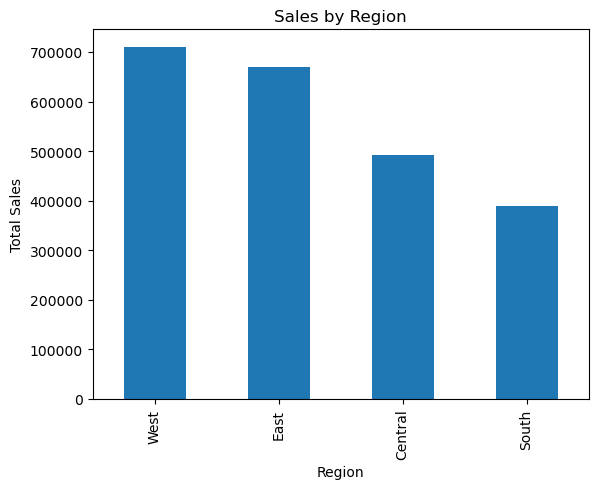

In [41]:
sales_by_region.plot(kind='bar')
plt.title("Sales by Region")
plt.ylabel("Total Sales")
plt.show()


## Sales by Category



In [43]:
sales_by_category = df.groupby('Category')['Sales'].sum()
sales_by_category


Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64

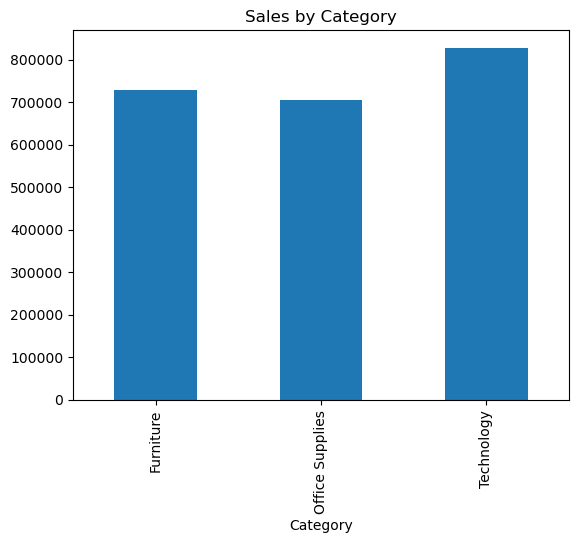

In [44]:
sales_by_category.plot(kind = 'bar')
plt.title("Sales by Category")
plt.show()

## Monthly Sales Trend


In [46]:
monthly_sales = df.groupby(['Order_Year', 'Order_Month'])['Sales'].sum().reset_index()
monthly_sales

,Order_Year,Order_Month,Sales
0,2015,1,14205.7070
1,2015,2,4519.8920
2,2015,3,55205.7970
3,2015,4,27906.8550
4,2015,5,23644.3030
5,2015,6,34322.9356
6,2015,7,33781.5430
7,2015,8,27117.5365
8,2015,9,81623.5268
9,2015,10,31453.3930


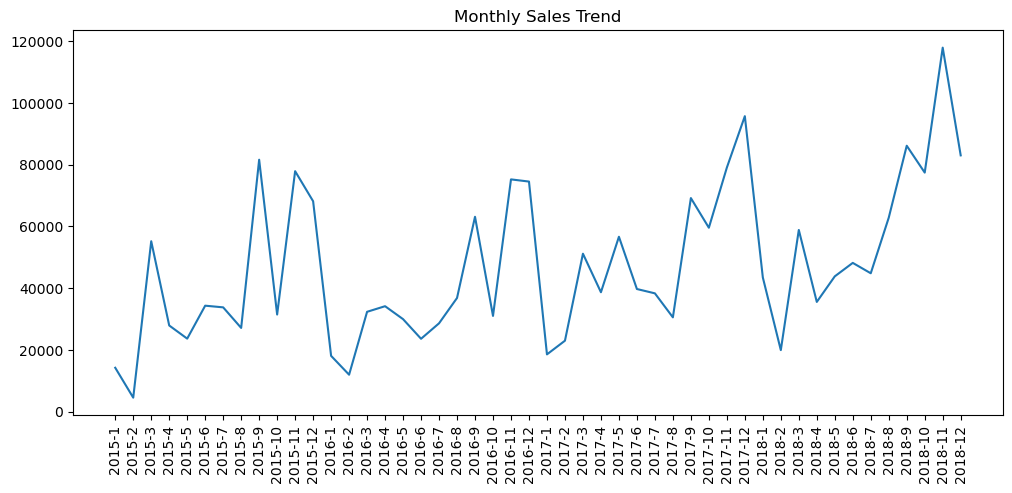

In [47]:
monthly_sales['Year_Month'] = monthly_sales['Order_Year'].astype(str) + "-" + monthly_sales['Order_Month'].astype(str)

plt.figure(figsize=(12,5))
plt.plot(monthly_sales['Year_Month'], monthly_sales['Sales'])
plt.xticks(rotation=90)
plt.title("Monthly Sales Trend")
plt.show()


## Sales by Customer Segment


In [52]:
segment_sales = df.groupby('Segment')['Sales'].sum()
segment_sales


Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64

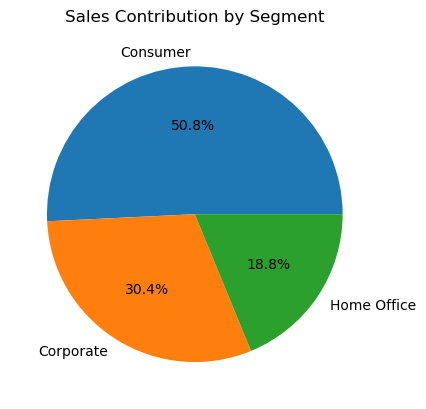

In [53]:
segment_sales.plot(kind = 'pie',autopct='%1.1f%%')
plt.title ("Sales Contribution by Segment")
plt.ylabel("")
plt.show()

## Top 10 Products by Sales


In [55]:
top_products = df.groupby('Product_Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products


Product_Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

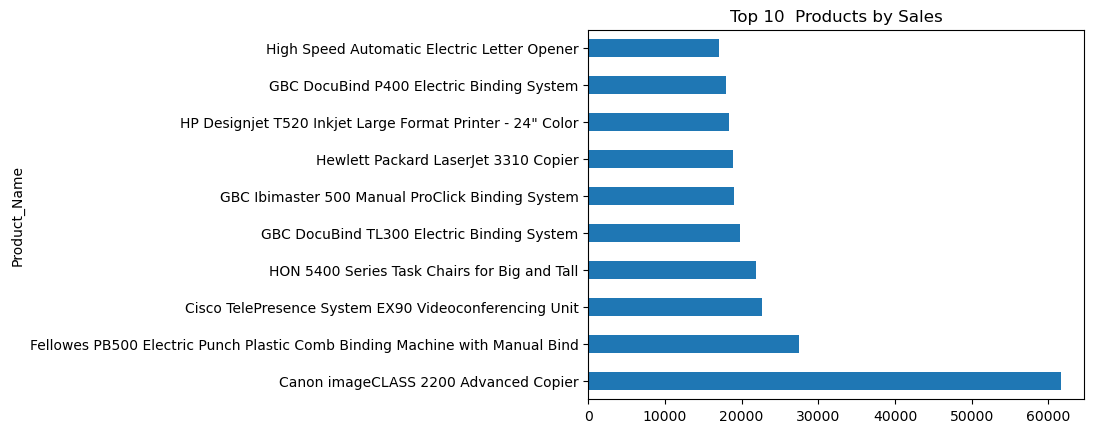

In [57]:
top_products.plot(kind='barh')
plt.title("Top 10  Products by Sales")
plt.show()

## Business Insights

- The West region generates the highest sales among all regions
- Technology category contributes the most to overall sales
- Sales show seasonal trends across months
- Consumer segment contributes the largest share of sales
- A small number of products contribute a significant portion of revenue


## Conclusion

This analysis provided insights into retail sales performance across regions, categories, and time.
The findings can help businesses focus on high-performing segments and optimize sales strategies.
